In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.datasets.samples_generator import make_blobs

In [3]:
# Generate sample data
np.random.seed(0)

batch_size = 45
centers = [[1, 1], [-1, -1], [1, -1]]
n_clusters = len(centers)
X, labels_true = make_blobs(n_samples=3000, centers=centers, cluster_std=0.7)

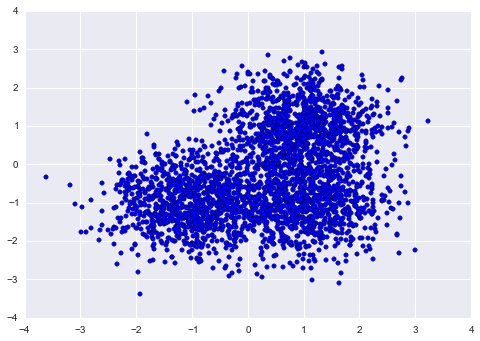

In [4]:
plt.scatter(X[:,0],X[:,1])

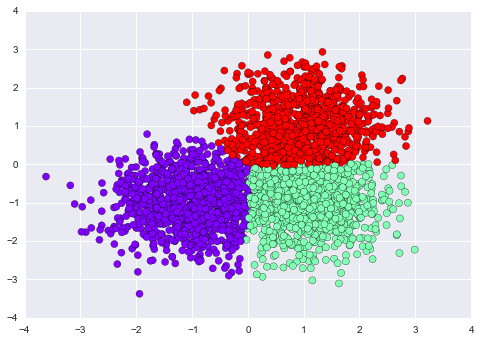

In [5]:
est = KMeans(3)  # 4 clusters
est.fit(X)
y_kmeans = est.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='rainbow');

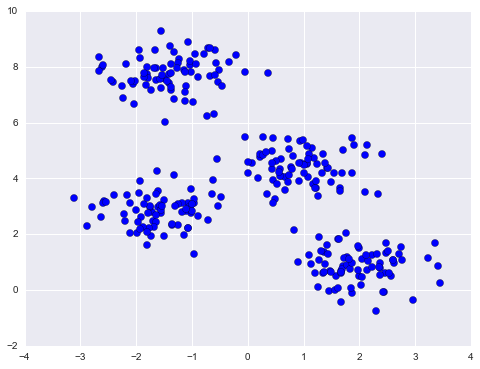

In [6]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=0.60)
plt.figure(figsize=(8,6));
plt.scatter(X[:, 0], X[:, 1], s=50);

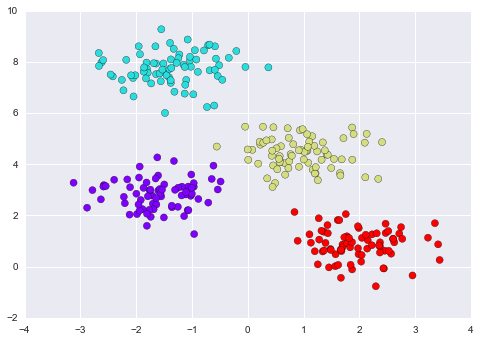

In [7]:
from sklearn.cluster import KMeans
est = KMeans(4)  # 4 clusters
est.fit(X)
y_kmeans = est.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='rainbow');

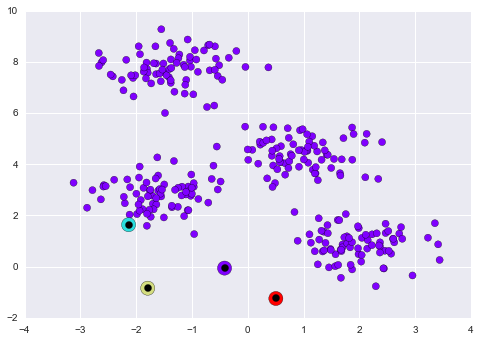

In [8]:
from fig_code import plot_kmeans_interactive
plot_kmeans_interactive();

In [9]:
### Clustering Comparison between different algorithms 

Wall time: 1.8 s


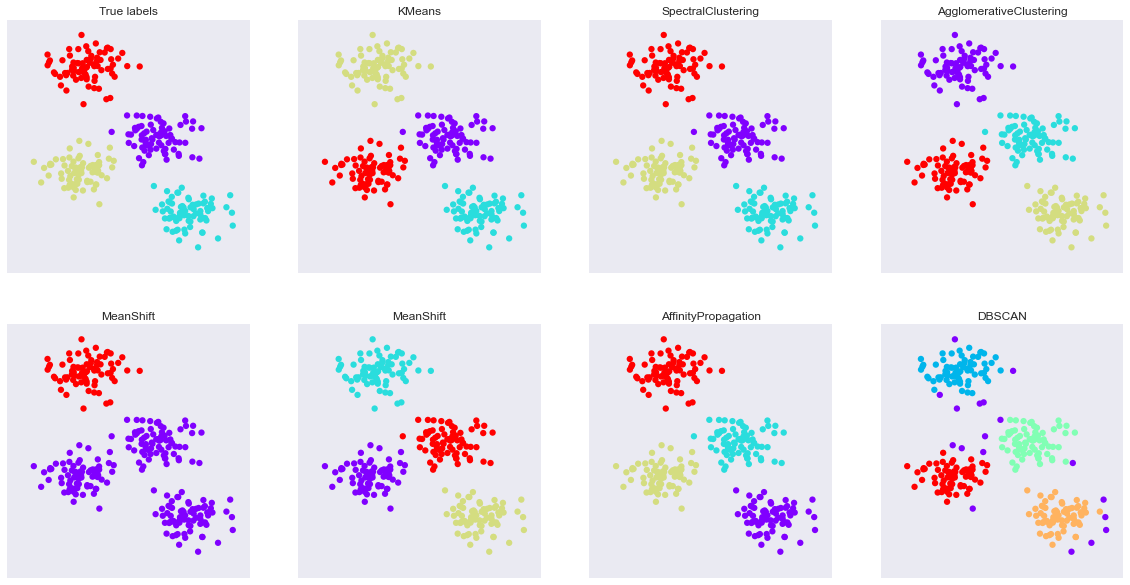

In [10]:
%%time
import sklearn.cluster as clu
plt.figure(figsize=(20,10));
plt.subplot(241);
plt.scatter(X[:,0], X[:,1], c=y, s=40,
            linewidths=0, cmap=plt.cm.rainbow);
plt.xticks([]); plt.yticks([]);
plt.title("True labels");
bandwidth = clu.estimate_bandwidth(X, quantile=0.2, n_samples=100)
for i, est in enumerate([
        clu.KMeans(4),
        clu.SpectralClustering(4),
        clu.AgglomerativeClustering(4),
        clu.MeanShift(),
        clu.MeanShift(bandwidth=bandwidth),
        clu.AffinityPropagation(preference=-50),
        clu.DBSCAN(),
    ]):
    est.fit(X);
    c = est.labels_
    plt.subplot(242 + i);
    plt.scatter(X[:,0], X[:,1], c=c, s=40,
                linewidths=0, cmap=plt.cm.rainbow);
    plt.xticks([]); plt.yticks([]);
    plt.title(est.__class__.__name__);

**AgglomerativeClustering** Recursively merges the pair of clusters that minimally increases a given linkage distance.    
**Kmean** Average Complexity O(k n T)   
**Affinity Propagation** - The main drawback of Affinity Propagation is its complexity. The algorithm has a time complexity of the order O(N^2 T).  The memory complexity is of the order O(N^2).    
**Meanshift** - estimate_bandwidth function is much less scalable than the mean shift algorithm and will be the bottleneck if it is used. Complexity O(T*n*log(n)) in lower dimensions. It tend towards O(T*n^2) in higer dimensions. 

n the number of samples and T the number of points

In [11]:
# Generate sample data
np.random.seed(0)
batch_size = 45
centers = [[1, 1], [-1, -1], [1, -1]]
n_clusters = len(centers)
X, y = make_blobs(n_samples=3000, centers=centers, cluster_std=0.7)

Wall time: 2min


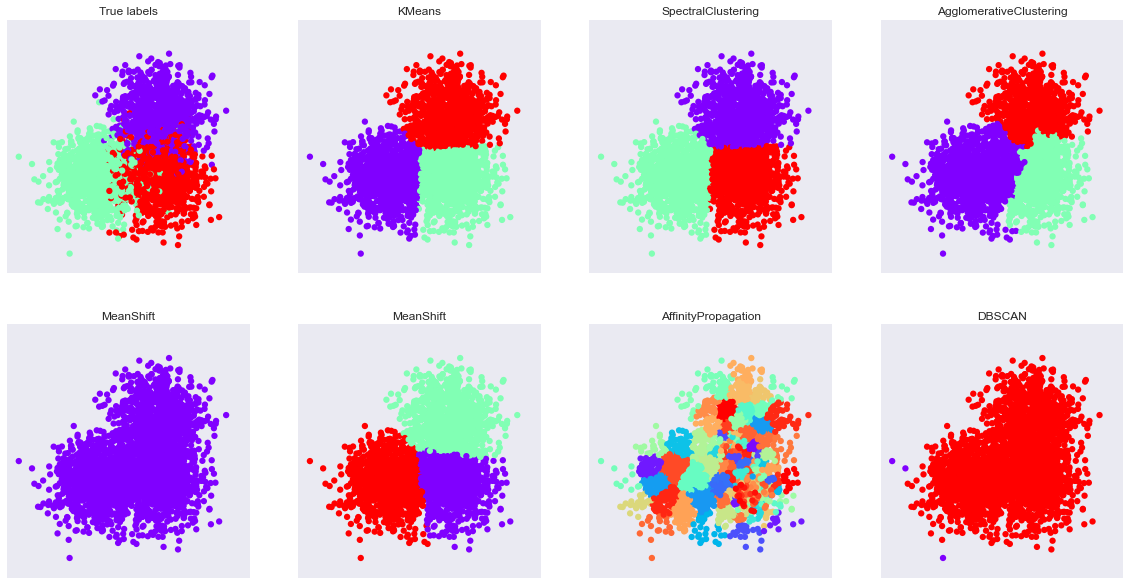

In [12]:
%%time
import sklearn.cluster as clu
plt.figure(figsize=(20,10));
plt.subplot(241);
plt.scatter(X[:,0], X[:,1], c=y, s=40,
            linewidths=0, cmap=plt.cm.rainbow);
plt.xticks([]); plt.yticks([]);
plt.title("True labels");
bandwidth = clu.estimate_bandwidth(X, quantile=0.2, n_samples=100)
for i, est in enumerate([
        clu.KMeans(3),
        clu.SpectralClustering(3),
        clu.AgglomerativeClustering(3),
        clu.MeanShift(),
        clu.MeanShift(bandwidth=bandwidth),
        clu.AffinityPropagation(),
        clu.DBSCAN(),
    ]):
    est.fit(X);
    c = est.labels_
    plt.subplot(242 + i);
    plt.scatter(X[:,0], X[:,1], c=c, s=40,
                linewidths=0, cmap=plt.cm.rainbow);
    plt.xticks([]); plt.yticks([]);
    plt.title(est.__class__.__name__);

### Image compression 

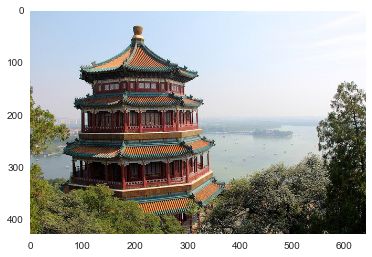

In [86]:
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
plt.imshow(china)
plt.grid(False);

In [87]:
china.shape

(427L, 640L, 3L)

In [88]:
np.reshape?

In [89]:
X = (china / 255.0).reshape(-1, 3)
print(X.shape)

(273280L, 3L)


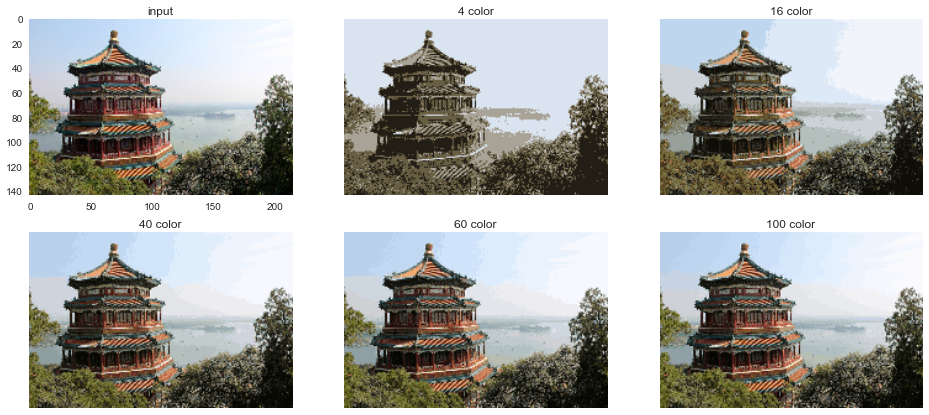

In [128]:
# reduce the size of the image for speed
image = china[::3, ::3]

X = (image / 255.0).reshape(-1, 3)
plt.figure(figsize=(16,7));
plt.subplot(231);
plt.imshow(image)
plt.title('input')
plt.grid(False);   

for i, n_colors in enumerate([4,16,40,60,100]):
    model = KMeans(n_colors)
    labels = model.fit_predict(X)
    colors = model.cluster_centers_
    new_image = colors[labels].reshape(image.shape)
    new_image = (255 * new_image).astype(np.uint8)
    plt.subplot(232 + i);
    plt.imshow(new_image)
    plt.xticks([]); plt.yticks([]);
    plt.title("%d color" %(n_colors))